In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("C:\\Users\\manta\\Desktop\\Womens Clothing E-Commerce Reviews.csv")

In [6]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
df.corr()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Unnamed: 0,1.000000,-0.006072,-0.007749,-0.002568,-0.003887,-0.002907
Clothing ID,-0.006072,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,-0.007749,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.002568,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended IND,-0.003887,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,-0.002907,0.046356,0.043079,-0.064961,-0.069045,1.000000


In [10]:
df.drop(columns=['Unnamed: 0','Clothing ID','Title'], inplace=True)

In [11]:
df

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [12]:
# drop the null values in review text
df.dropna(subset=['Review Text'], inplace=True)

# For 'Division Name', 'Department Name', and 'Class Name', fill missing values with the mode (most common value)
for column in ['Division Name', 'Department Name', 'Class Name']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [13]:
# Check if there are any missing values left
missing_values_after = df.isnull().sum()

In [14]:
print('Missing values handled.')
print(missing_values_after)

Missing values handled.
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


In [15]:
df['Review Text'].sample(1)

13645    I bought this beautiful  dress at the store ye...
Name: Review Text, dtype: object

In [16]:
pd.options.display.max_colwidth = None # sets the colwith to max without any limitations for words
df['Review Text'].sample(1) # picks up a random review text from the dataset

8990    I love these pants. they are beautifully made and appear to be very comfortable. now if i could just get them buttoned! i am a size 8/medium. i bought the large after reading other reviews. i'm not joking when i say i can't button them. i am in such love with them (and still hoping to lose some baby weight), that i am going to keep them in hopes to wear them!
Name: Review Text, dtype: object

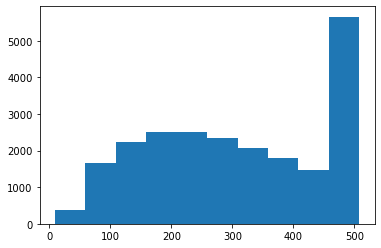

In [17]:
plt.hist(df['Review Text'].str.len())# calculates the length (number of characters) of each text entry
plt.show()

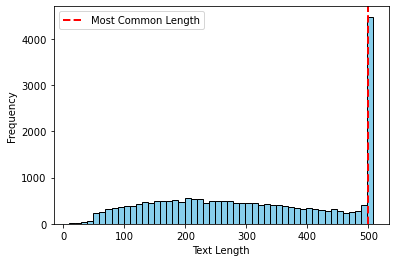

The most common text length is: 500 characters.


In [18]:
df['Text Length'] = df['Review Text'].str.len()

# Find the most common text length
most_common_length = df['Text Length'].mode().iloc[0]

# Plot a histogram of text lengths
plt.hist(df['Text Length'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(most_common_length, color='red', linestyle='dashed', linewidth=2, label='Most Common Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"The most common text length is: {most_common_length} characters.")

In [19]:
df[df['Review Text'].str.len() == 500]['Review Text'] # setting the text charatcters of review text col to most common lenth of the characters used .i.e 500 

2            I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
14           This is a nice choice for holiday gatherings. i like that the length grazes the knee so it is conservative enough for office related gatherings. the size small fit me well - i am usually a size 2/4 with a small bust. in my opinion it runs small and those with larger busts will definitely have to size up (but then perhaps the waist will be too big). the problem with this dress is the quality. the fabrics are terrible. the delicate netting type fabric on the top layer of

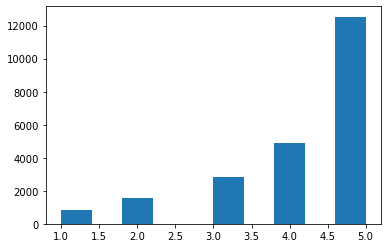

In [20]:
plt.hist(df['Rating'])
plt.show()

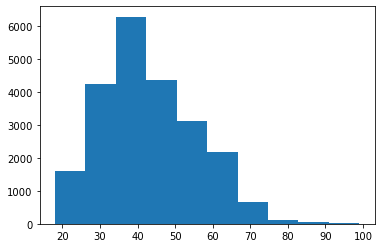

In [21]:
plt.hist(df['Age'])
plt.show()

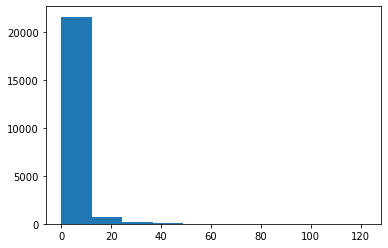

In [22]:
plt.hist(df['Positive Feedback Count'])
plt.show()

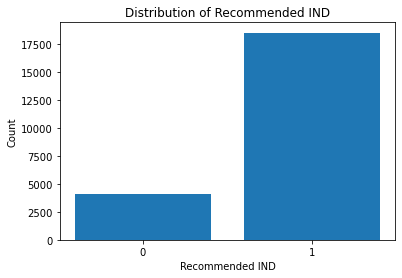

In [23]:
recomm_counts = df['Recommended IND'].value_counts().sort_index()
plt.bar(recomm_counts.index, recomm_counts.values)
plt.xlabel('Recommended IND')
plt.ylabel('Count')
plt.title('Distribution of Recommended IND')
plt.xticks(recomm_counts.index) 
plt.show()

In [24]:
df['Division Name'].value_counts()

General           13378
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

In [25]:
df['Department Name'].value_counts()

Tops        10061
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [26]:
df['Class Name'].value_counts()

Dresses           6158
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

In [27]:
#Replace typo
df['Division Name'] = df['Division Name'].replace({'Initmates': 'Intimates'})

# Replace for consistency between division, department, and class names
df['Department Name'] = df['Department Name'].replace({'Intimate': 'Intimates'})

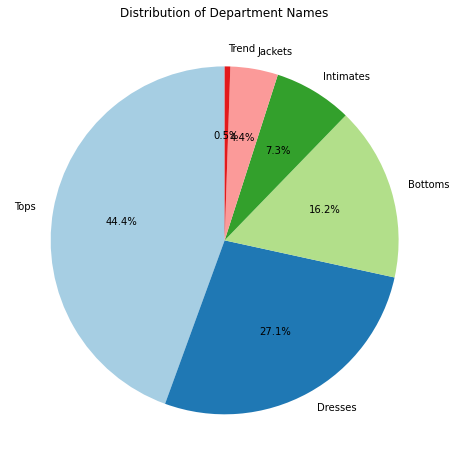

In [28]:
department_counts = df['Department Name'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Department Names')
plt.show()

In [29]:
columns_to_strip = ['Review Text', 'Division Name', 'Department Name', 'Class Name']

for column in columns_to_strip:
    df[column] = df[column].str.strip()# removing extra spaces 

In [30]:
from textblob import TextBlob

In [31]:
df['polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [32]:
df['word_count'] = df['Review Text'].apply(lambda x: len(x.split()))

In [33]:
df['word_count'] 

0         8
1        62
2        98
3        22
4        36
         ..
23481    28
23482    38
23483    42
23484    86
23485    19
Name: word_count, Length: 22641, dtype: int64

In [34]:
df['polarity']

0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
23481    0.552667
23482    0.091667
23483    0.414286
23484    0.322222
23485    0.413889
Name: polarity, Length: 22641, dtype: float64

In [35]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [36]:
df['Avg_Word_Length'] = df['Review Text'].apply(get_avg_word_len)

In [60]:
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
nltk.download('words')
nltk.download('stopwords')
stop = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\manta\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
# Preprocess the 'Review Text' column
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def clean_text(review):
    # I. Removing URL
    review = re.sub(r'http\S+', '', review)
    
    # II. Removing all irrelevant characters (Numbers and Punctuation)
    review = re.sub(f"[{string.punctuation}0-9]", "", review)
    
    # III. Convert all characters into lowercase
    review = review.lower()
    
    # IV. Tokenization
    tokens = review.split()
    
    # V. Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # VI. Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    
    # VII. Remove the words having length <= 2
    tokens = [word for word in tokens if len(word) > 2]
    
    # VIII. Convert the list of tokens back to a string
    cleaned_review = ' '.join(tokens)
    
    return cleaned_review


stop_words = stopwords.words('english')

In [62]:
# Apply the clean_text function to the "Review Text" column of the DataFrame
df['Review Text'] = df['Review Text'].apply(clean_text)

In [63]:
df['Review Text'].sample(5)

17501                                                                                                                                           dress summer wardrob rust color relax dress easi throw other suggest add belt add littl flair love design run larg size help immens
321                                                                                                                                                                         blous pretti love long tie pattern uniqu thin light weight fabric easili wear underneath leather jacket
12011                                                                                                                                                                                                fit nice standard size place also perfect inbetween occas dress worn flat heel
16115                                                                                                                                         dress great buy especi sinc sa

In [64]:
file_pos= open("positive-words.txt","r")

In [65]:
positive=[]
for i in file_pos.read().split():
    positive.append(i)

In [66]:
file_neg= open("negative-words.txt","r",encoding='latin-1')

In [67]:
negative=[]
for i in file_neg.read().split():
    negative.append(i)

In [68]:
score_positive=[]
score_negative=[]
def scoring(x):
    p=0
    n1=0
    for i in x.split():
        if i in positive:
            p+=1
        if i in negative:
            n1+=-1        
    score_positive.append(p)
    score_negative.append(n1)

In [69]:
df['Review Text'].apply(scoring)

0        None
1        None
2        None
3        None
4        None
         ... 
23481    None
23482    None
23483    None
23484    None
23485    None
Name: Review Text, Length: 22641, dtype: object

In [70]:
for i in range(len(score_negative)):
    score_negative[i]=score_negative[i]*-1

In [71]:
df['Positive Score']=score_positive
df['Negative Score']=score_negative

In [72]:
df['Polarity_score'] =(df['Positive Score'] - df['Negative Score']) / (df['Positive Score'] + df['Negative Score'] + 0.000001)

In [73]:
df['Subjectivity Score'] = (df['Positive Score'] + df['Negative Score'])/ ((df['word_count']) + 0.000001)

In [74]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Text Length,polarity,word_count,Avg_Word_Length,Positive Score,Negative Score,Polarity_score,Subjectivity Score
0,33,absolut wonder silki sexi comfort,4,1,0,Intimates,Intimates,Intimates,53,0.633333,8,5.750000,2,0,1.000000,0.250000
1,34,love dress sooo pretti happen find store glad never would order onlin petit bought petit love length hit littl knee would definit true midi someon truli petit,5,1,4,General,Dresses,Dresses,303,0.339583,62,3.822581,3,0,1.000000,0.048387
2,60,high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper,3,0,0,General,Dresses,Dresses,500,0.073675,98,4.112245,4,3,0.142857,0.071429
3,50,love love love jumpsuit fun flirti fabul everi time wear get noth great compliment,5,1,0,General Petite,Bottoms,Pants,124,0.550000,22,4.681818,6,0,1.000000,0.272727
4,47,shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt,5,1,6,General,Tops,Blouses,192,0.512891,36,4.361111,4,0,1.000000,0.111111


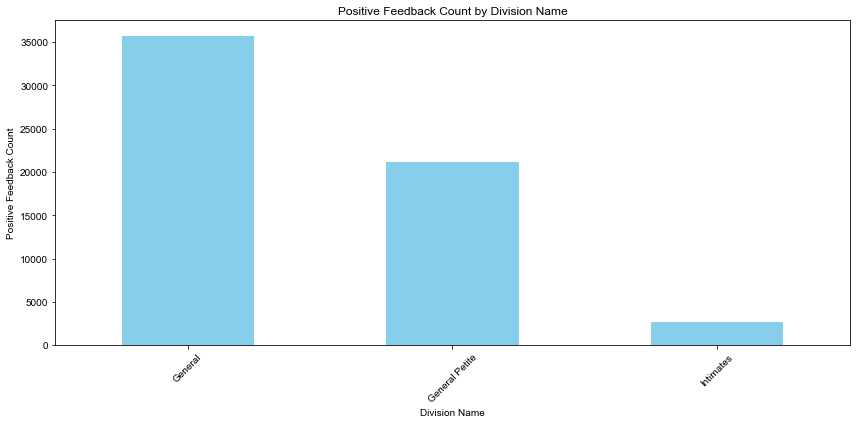

In [75]:
# Create a bar plot of Positive Feedback Count against Division Name
plt.figure(figsize=(12, 6))
df.groupby('Division Name')['Positive Feedback Count'].sum().plot(kind='bar', color='skyblue')
plt.title('Positive Feedback Count by Division Name')
plt.xlabel('Division Name')
plt.ylabel('Positive Feedback Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

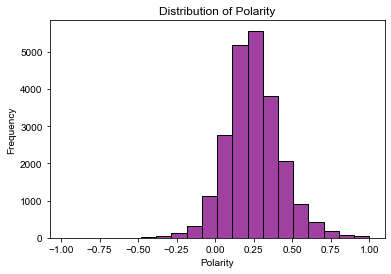

In [78]:
# Create a histogram of the 'polarity' column
import seaborn as sns
sns.histplot(df['polarity'], bins=20, kde=False, color='purple')
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

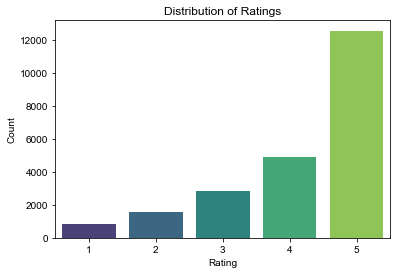

In [79]:
# Create a countplot for the 'Rating' column 
sns.countplot(data=df, x='Rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

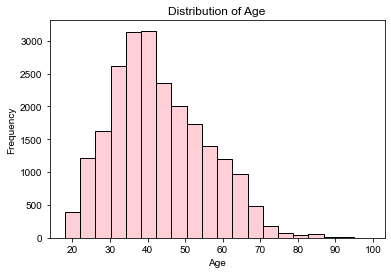

In [81]:
# Create a histogram for the 'Age' column 
sns.histplot(data=df, x='Age', bins=20, color='pink')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df

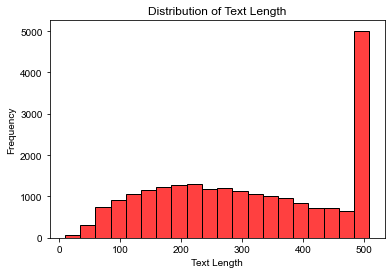

In [82]:
# Create a histogram for the 'Text_len' column 
sns.histplot(data=df, x='Text Length', bins=20, color='red')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

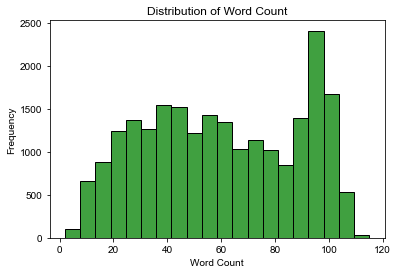

In [84]:
# Create a histogram for the 'word_count' column 
sns.histplot(data=df, x='word_count', bins=20, color='green')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

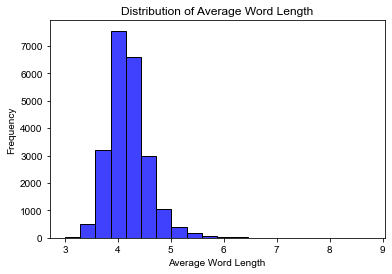

In [85]:
# Create a histogram for the 'Avg_Word_Length' column 
sns.histplot(data=df, x='Avg_Word_Length', bins=20, color='blue')
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()

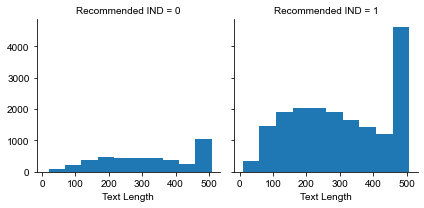

In [86]:
g = sns.FacetGrid(df,col='Recommended IND',palette='viridis')
g.map(plt.hist,'Text Length')

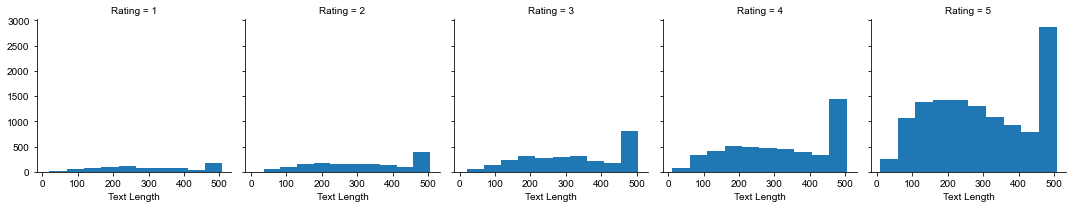

In [87]:
g = sns.FacetGrid(df,col='Rating',palette='viridis')
g.map(plt.hist,'Text Length')

In [88]:
df.columns

Index(['Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Text Length', 'polarity', 'word_count',
       'Avg_Word_Length', 'Positive Score', 'Negative Score', 'Polarity_score',
       'Subjectivity Score'],
      dtype='object')

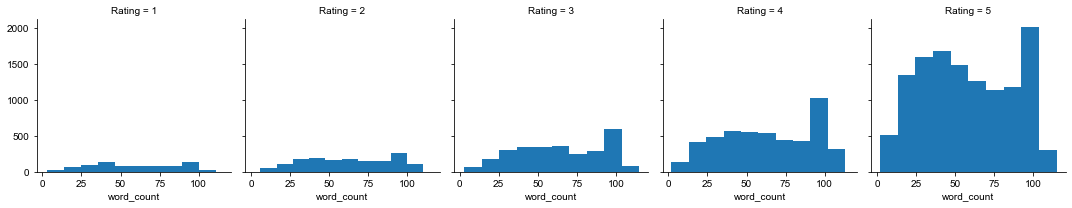

In [89]:
g = sns.FacetGrid(df,col='Rating',palette='viridis')
g.map(plt.hist,'word_count')

In [90]:
# Create a pie chart for 'Rating'
import plotly.express as px
rating_counts = df['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

fig1 = px.pie(rating_counts, names='Rating', values='Count', title='Pie Chart of Ratings')

# Create a pie chart for 'Recommended IND'
recommend_counts = df['Recommended IND'].value_counts().reset_index()
recommend_counts.columns = ['Recommended IND', 'Count']

fig2 = px.pie(recommend_counts, names='Recommended IND', values='Count', title='Pie Chart of Recommended ')

# Display the pie charts
fig1.show()
fig2.show()

In [ ]:
df.columns

In [91]:
# Create a pie chart for 'Rating'
import plotly.express as px
dept_name = df['Department Name'].value_counts().reset_index()
dept_name.columns = ['Department Name', 'Count']

fig = px.pie(dept_name, names='Department Name', values='Count', title='Pie Chart of Department Name')

# Display the pie charts
fig.show()

In [92]:
# Create a pie chart for 'Rating'
import plotly.express as px
pos_score = df['Positive Score'].value_counts().reset_index()
pos_score.columns = ['Positive Score', 'Count']

fig1 = px.pie(pos_score, names='Positive Score', values='Count', title='Pie Chart of Positive Score')

# Create a pie chart for 'Recommended IND'
neg_score = df['Negative Score'].value_counts().reset_index()
neg_score.columns = ['Negative Score', 'Count']

fig2 = px.pie(neg_score, names='Negative Score', values='Count', title='Pie Chart of Negative Score ')

# Display the pie charts
fig1.show()
fig2.show()

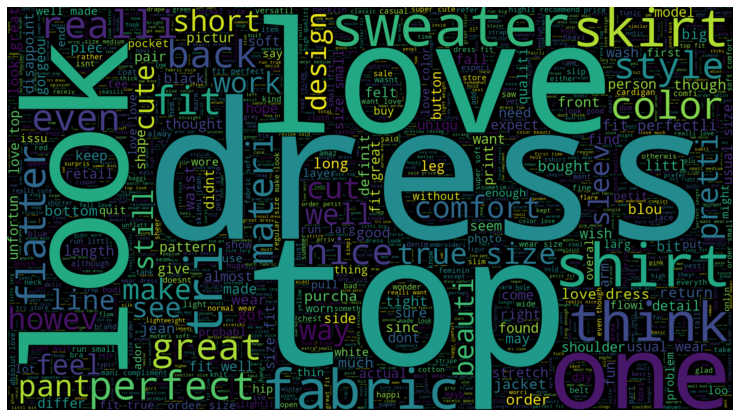

In [94]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud, STOPWORDS 
df['Review Text'] = df['Review Text'].astype(str)

plt.figure(figsize = (13,13))
# generating the WordCloud
wc = WordCloud(
    max_words=2000,
    width=1800,
    height=1000,
    stopwords=STOPWORDS
).generate(" ".join(df['Review Text']))

# Set a custom TrueType font as the default font for Matplotlib
font_path = "C:\\Windows\\Fonts\\Arial.ttf"
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

# Set a default font for Matplotlib
plt.rcParams['font.family'] = 'Arial'

# Display the WordCloud using imshow
plt.imshow(wc, interpolation='bilinear')

# Turn off axis labels
plt.axis("off")

# Show the plot
plt.show()

In [95]:
#Detect Reviews (positive and negative separately by recommendation) 
positive_sentences = df[df["Recommended IND"] == 1]["Review Text"]
positive_sentences

0                                                                                                                                                                                                                                                                          absolut wonder silki sexi comfort
1                                                                                                                                             love dress sooo pretti happen find store glad never would order onlin petit bought petit love length hit littl knee would definit true midi someon truli petit
3                                                                                                                                                                                                                         love love love jumpsuit fun flirti fabul everi time wear get noth great compliment
4                                                                                                

In [96]:
#Detect Reviews (positive and negative separately by recommendation) 
negative_sentences = df[df["Recommended IND"] == 0]["Review Text"]
negative_sentences

2        high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper
5                                         love traci rees dress one petit foot tall usual wear brand dress pretti packag lot dress skirt long full overwhelm small frame stranger alter shorten narrow skirt would take away embellish garment love color idea style work return dress
10                                                                                                                 dress run small esp zipper area run order typic fit tight materi top look feel cheap even pull caus rip fabric pretti disappoint christma dress year needl say back
22                                                           first pullov style side zipper wouldnt purchas knew side zipper larg bust side zipper next imposs seco

In [97]:
#Collect Words (positive and negative separately) 
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolut wonder silki sexi comfort love dress sooo pretti happen find store glad never would order onlin petit bought petit love length hit littl knee would definit true midi someon truli petit love love love jumpsuit fun flirti fabul everi time wear get noth great compliment shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt ade basket hte last mintu see would look like person store pick went teh darkler color pale hte color realli gorgeou turn mathc everythi tri prefectli littl baggi hte hte msallet size bummer petit decid jkeep though said matvehd everyth ejan pant skirt waa tri kept oop order carbon store pick ton stuff alway tri use top pair skirt pant everyth went color realli nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleev long doesnt petit also bit loos kept wil ldecid later sinc light color alreadi sold hte smallest size love dress usual get run littl snug bust order size flatter feminin usual 

In [98]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper love traci rees dress one petit foot tall usual wear brand dress pretti packag lot dress skirt long full overwhelm small frame stranger alter shorten narrow skirt would take away embellish garment love color idea style work return dress dress run small esp zipper area run order typic fit tight materi top look feel cheap even pull caus rip fabric pretti disappoint christma dress year needl say back first pullov style side zipper wouldnt purchas knew side zipper larg bust side zipper next imposs second tull feel look cheap slip awkward tight shape underneath look like describ sadli return sure find someth exchang love materi didnt realli look long dress purchas larg medium atleast materi foot gap front much wider look fel

In [99]:
#Create Word Cloud (for most common words in recommended not recommended reviews separately)
wordcloud_positive = WordCloud(background_color = "black", max_words = 250, colormap = "inferno")

In [100]:
wordcloud_positive.generate(positive_words)

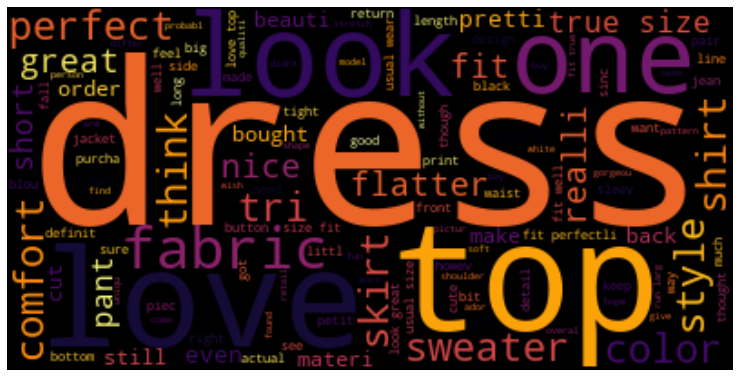

In [101]:
#wordlcloud for positive words
plt.figure(figsize = (13,13))

# Set a default font for Matplotlib
plt.rcParams['font.family'] = 'Arial'
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

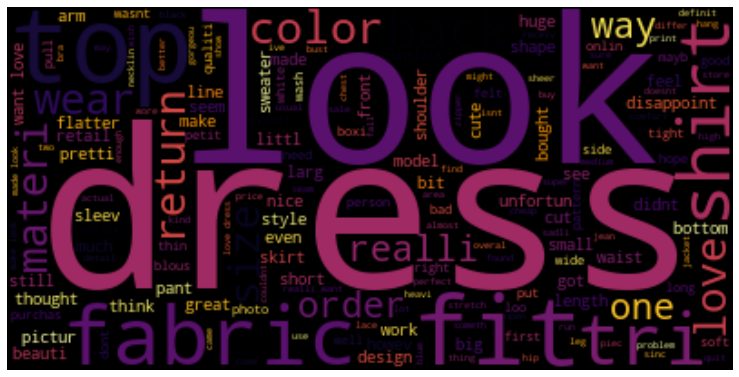

In [102]:
#wordcloud for negative words
wordcloud_negative = WordCloud(background_color = "black", max_words = 250, colormap = "inferno")
wordcloud_negative.generate(negative_words)

plt.figure(figsize = (13, 13))


# Set a default font for Matplotlib
plt.rcParams['font.family'] = 'Arial'
plt.imshow(wordcloud_negative, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [103]:
total_reviews = len(df)
positive_reviews = df[df['Recommended IND'] == 1]
negative_reviews = df[df['Recommended IND'] == 0]

# Calculate the percentage of positive and negative reviews
percentage_positive = (len(positive_reviews) / total_reviews) * 100
percentage_negative = (len(negative_reviews) / total_reviews) * 100

print("Percentage of Positive Reviews: {:.2f}%".format(percentage_positive))
print("Percentage of Negative Reviews: {:.2f}%".format(percentage_negative))

Percentage of Positive Reviews: 81.89%
Percentage of Negative Reviews: 18.11%
